In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
titanic_df = pd.read_csv("data/titanic.csv")

In [24]:
numeric_val = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic_df[numeric_val].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [25]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
#Age에 결측값있어서 중앙값 대체
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [27]:
titanic_df[numeric_val].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [28]:
#결과가 잘 나올것이라 판단되는 Age, Fare만 이상치 탐지 진행

In [29]:
#Age
Q1 = titanic_df['Age'].quantile(0.25)
Q3 = titanic_df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

print(f"Age IQR 범위: {lower:.2f} ~ {upper:.2f}")
print(f"Age IQR 이상치 수: {(titanic_df['Age'] < lower).sum() + (titanic_df['Age'] > upper).sum()}")

Age IQR 범위: 2.50 ~ 54.50
Age IQR 이상치 수: 66


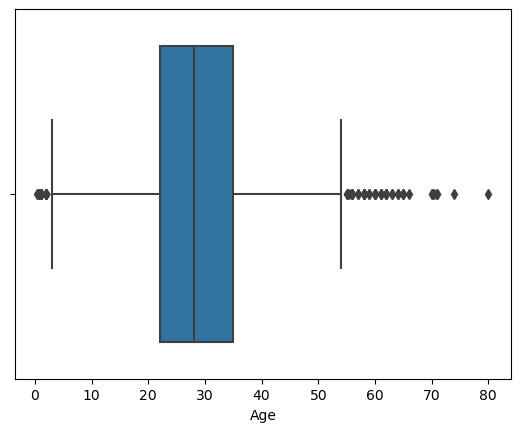

In [30]:
sns.boxplot(x=titanic_df['Age'])
plt.show()

In [31]:
#Fare
Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

print(f"Fare IQR 범위: {lower:.2f} ~ {upper:.2f}")
print(f"Fare IQR 이상치 수: {(titanic_df['Fare'] < lower).sum() + (titanic_df['Fare'] > upper).sum()}")

Fare IQR 범위: -26.72 ~ 65.63
Fare IQR 이상치 수: 116


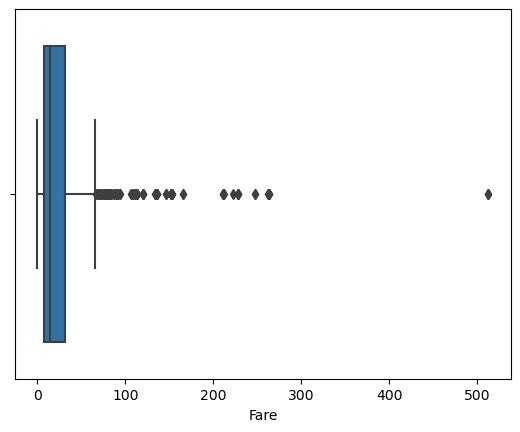

In [32]:
sns.boxplot(x=titanic_df['Fare'])
plt.show()

In [33]:
def check_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column} IQR 범위: {lower:.2f} ~ {upper:.2f}")
    print(f"Fare IQR 이상치 수: {(data[column] < lower).sum() + (data[column] > upper).sum()}")
    return outliers

Age IQR 범위: 2.50 ~ 54.50
Fare IQR 이상치 수: 66


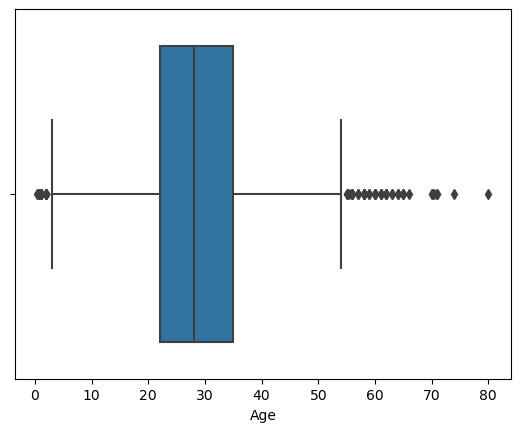

Fare IQR 범위: -26.72 ~ 65.63
Fare IQR 이상치 수: 116


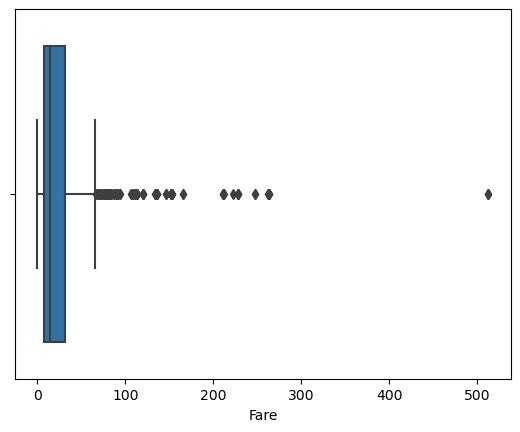

In [34]:
for col in ['Age', 'Fare']:
    outliers = check_outliers_iqr(titanic_df, col)
    sns.boxplot(x=titanic_df[col])
    plt.show()

In [35]:
#Z-score 방식
from scipy.stats import zscore

titanic_z = titanic_df[['Age', 'Fare']].copy()
z_scores = zscore(titanic_z)
titanic_z = pd.DataFrame(z_scores, columns=['Age', 'Fare'])

Age z-score 이상치 수: 7


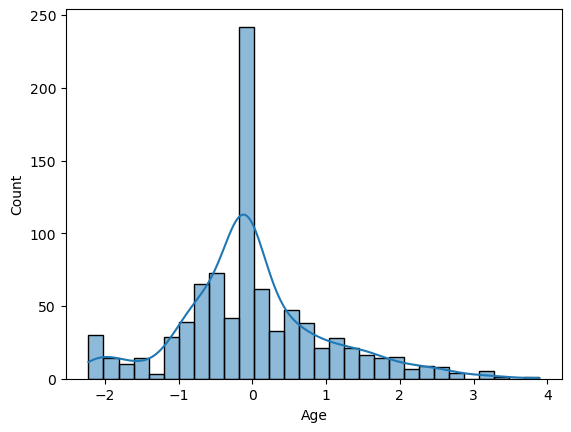

Fare z-score 이상치 수: 20


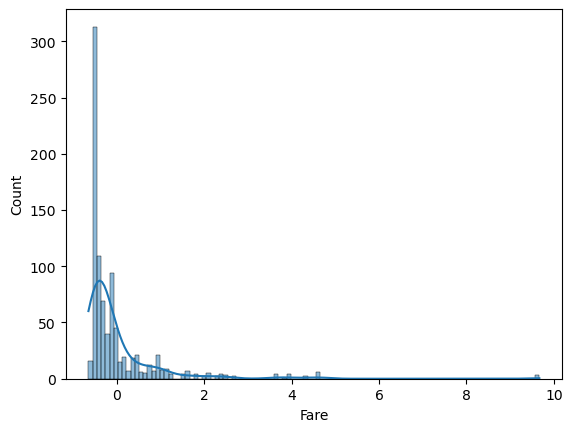

In [36]:
for col in titanic_z.columns:
    count = (np.abs(titanic_z[col]) > 3).sum()
    print(f"{col} z-score 이상치 수: {count}")
    sns.histplot(titanic_z[col], kde=True)
    plt.show()

In [37]:
#히스토그램상 age는 정규분포에 가깝고, Fare는 왼쪽으로 많이 치우쳐져 있음

In [38]:
# 상관관계 분석
corr = titanic_df[numeric_val].corr()
corr

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,-0.549500,0.096688,0.159651,0.216225,1.000000


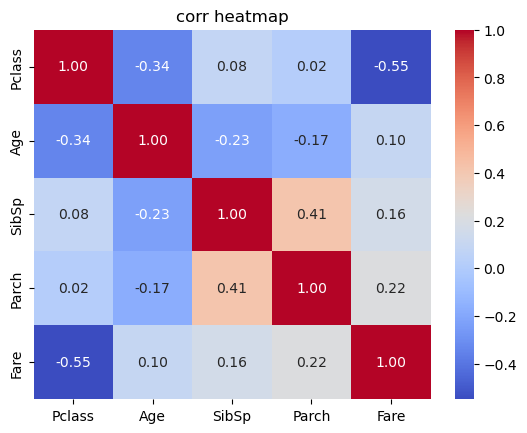

In [39]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('corr heatmap')
plt.show()

In [40]:
"""
상관계수의 판단은 대략 절댓값 기준
0.00 ~ 0.10 : 매우 약함 (무시 가능), 거의 무상관, 관련성 없음
0.10 ~ 0.30 : 약한 상관, 약한 관련성, 데이터 노이즈 수준
0.30 ~ 0.50 : 중간 정도, 유의미한 상관 관계 가능성
0.50 ~ 0.70 : 강한 상관, 명확한 관련성, 인과 가능성 탐색 대상
0.70 ~ 0.90 : 매우 강한 상관, 변수 간 관계가 뚜렷함, 다중공선성 가능성 있음
0.90 ~ 1.00 : 거의 완벽한 상관, 변수 간 중복 가능성, 동일 정보 수준
"""

'\n상관계수의 판단은 대략 절댓값 기준\n0.00 ~ 0.10 : 매우 약함 (무시 가능), 거의 무상관, 관련성 없음\n0.10 ~ 0.30 : 약한 상관, 약한 관련성, 데이터 노이즈 수준\n0.30 ~ 0.50 : 중간 정도, 유의미한 상관 관계 가능성\n0.50 ~ 0.70 : 강한 상관, 명확한 관련성, 인과 가능성 탐색 대상\n0.70 ~ 0.90 : 매우 강한 상관, 변수 간 관계가 뚜렷함, 다중공선성 가능성 있음\n0.90 ~ 1.00 : 거의 완벽한 상관, 변수 간 중복 가능성, 동일 정보 수준\n'

In [41]:
# 상관계수 절댓값 기준으로 필터링
threshold = 0.5
strong_corrs = (corr.abs() > threshold) & (corr.abs() < 1.0)

for col in strong_corrs.columns:
    related = strong_corrs.index[strong_corrs[col]].tolist()
    if related:
        print(f"{col} ↔ {related}")

Pclass ↔ ['Fare']
Fare ↔ ['Pclass']


In [42]:
print(type(corr))

<class 'pandas.core.frame.DataFrame'>
